# 📊  Employee Attrition Analysis & Classification for Strategic Workforce Insights

### 🧭 Introduction

Understanding why employees leave an organization is critical for improving retention strategies and sustaining a productive workforce. This project explores employee attrition data with the objective of identifying key factors contributing to staff turnover. Through exploratory data analysis (EDA) and predictive modeling, we aim to uncover actionable insights that Human Resources (HR) teams can leverage to reduce attrition risk.

This analysis covers:

- Comprehensive EDA to explore trends and correlations

- Identification of significant features influencing attrition

- Classification model to predict likelihood of attrition

- Visualization of feature importance

- Definition of sentiment classes in JSON format for future classification tasks

The insights derived from this project are intended to assist HR professionals in proactive decision-making, workforce planning, and employee engagement strategies

### 📥 Load the Dataset

We begin by importing the necessary library and loading the dataset into a Pandas DataFrame.

- import pandas as pd: Imports the Pandas library, which is widely used for data analysis and manipulation in Python.

- pd.read_csv(...): Reads the CSV file from the specified path and loads it into a DataFrame named df.

- df.head(): Displays the first 5 rows of the dataset, helping you quickly examine the structure, column names, and sample data.

This initial step is essential for verifying that the dataset has been successfully loaded and for understanding its basic structure before performing further analysis.


In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv(r"C:\Users\lenovo\Downloads\employee_attrition.csv")

# Preview
df.head()


,EmployeeID,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
0,1,110,4,9,5,4,4,1
1,2,103,3,51,1,4,2,0
2,3,41,4,16,5,4,4,1
3,4,32,4,17,5,2,3,0
4,5,80,3,16,3,4,2,0


### 🧾 Inspecting the Dataset Structure

In this section, we explore the overall structure and quality of the dataset to prepare for deeper analysis.

- df.info(): Provides a concise summary of the DataFrame, including the number of non-null entries, column names, data types, and memory usage. Useful for quickly identifying null values and data types.

- df.isnull().sum(): Shows the total number of missing (null) values in each column, helping to identify areas that may need cleaning or imputation.

- df.columns: Lists all the column names in the DataFrame, which is helpful for selecting or referencing them in further analysis.

- df.sample(5): Displays 5 randomly selected rows from the dataset to get a varied sense of the data and its distribution.

This step helps us understand the dataset’s completeness, data types, and general layout before moving into detailed analysis or preprocessing.

In [2]:
# Dataset structure
df.info()

# Check for missing values
df.isnull().sum()

# Check columns
df.columns

# Sample entries
df.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   EmployeeID            1000 non-null   int64
 1   TotalMonthsOfExp      1000 non-null   int64
 2   TotalOrgsWorked       1000 non-null   int64
 3   MonthsInOrg           1000 non-null   int64
 4   LastPayIncrementBand  1000 non-null   int64
 5   AverageFeedback       1000 non-null   int64
 6   LastPromotionYears    1000 non-null   int64
 7   Attrition             1000 non-null   int64
dtypes: int64(8)
memory usage: 62.6 KB


,EmployeeID,TotalMonthsOfExp,TotalOrgsWorked,MonthsInOrg,LastPayIncrementBand,AverageFeedback,LastPromotionYears,Attrition
478,479,90,1,39,3,1,3,0
925,926,17,3,2,1,2,1,0
336,337,71,5,6,4,1,1,0
989,990,114,1,93,2,3,4,1
719,720,40,1,26,5,3,1,0


### 📊  Summary Statistics and Value Distribution

This section provides an overview of the dataset’s numerical characteristics and explores the distribution of the target variable.

- df.describe(): Computes summary statistics such as count, mean, standard deviation, minimum, maximum, and quartiles for all numerical columns. This helps understand the central tendency and spread of the data.

- df['Attrition'].value_counts(): Counts how many times each unique value appears in the ‘Attrition’ column. This is important to check class balance, especially if ‘Attrition’ is the target variable for classification.

These insights guide data preprocessing and modeling decisions, such as handling imbalanced classes or scaling features.

In [3]:

# Summary statistics
df.describe()

# Check value distribution
df['Attrition'].value_counts()

Attrition
0    770
1    230
Name: count, dtype: int64

### 📈  Visualizing Attrition Distribution

This section creates a count plot to visualize the distribution of employee attrition in the dataset.

- import seaborn as sns and import matplotlib.pyplot as plt: Imports visualization libraries used for creating attractive and informative plots.

- palette_colors: Defines specific colors for the two attrition categories — blue for “Employed” and red for “Left”.

- sns.countplot(...): Creates a bar plot showing the count of employees in each attrition category.

- plt.title(...): Adds a descriptive title to the plot.

- plt.xticks(...): Replaces default x-axis tick labels (0 and 1) with more meaningful labels “Employed” and “Left”.

- plt.show(): Displays the plot.

This visualization provides a clear view of how many employees stayed versus left, which is crucial for understanding attrition trends.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17552\2768564855.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette=palette_colors)


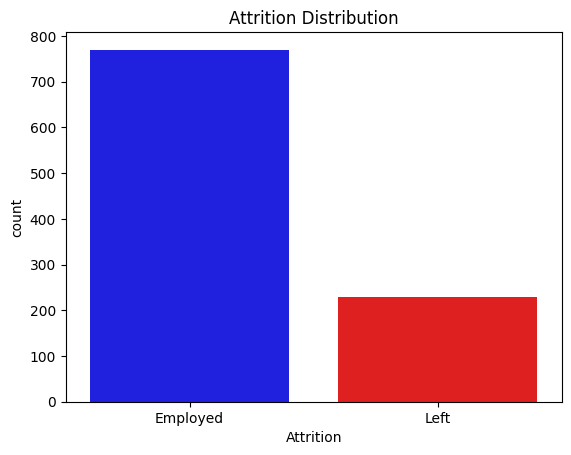

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
palette_colors = {"0": "blue", "1": "red"}

# Create the countplot with custom colors
sns.countplot(x='Attrition', data=df, palette=palette_colors)

# Customize the plot
plt.title("Attrition Distribution")
plt.xticks([0, 1], ['Employed', 'Left'])
plt.show()


### 📊  Boxplot of Feedback Scores by Attrition Status

This visualizes the distribution of employee feedback scores based on whether they stayed or left the company.

- sns.boxplot(...): Creates a boxplot that displays the distribution, median, quartiles, and potential outliers of the ‘AverageFeedback’ scores for employees who stayed (0) versus those who left (1).

- palette_colors: Assigns blue for employees who stayed and red for those who left, enhancing visual clarity.

- plt.title(...) and plt.xticks(...): Add a meaningful title and replace numeric x-axis labels with descriptive categories (“Employed” and “Left”).

This plot helps to understand whether feedback scores differ significantly between the two attrition groups, which could be important for retention analysis.

C:\Users\lenovo\AppData\Local\Temp\ipykernel_17552\2702601433.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Attrition', y='AverageFeedback', data=df, palette=palette_colors)


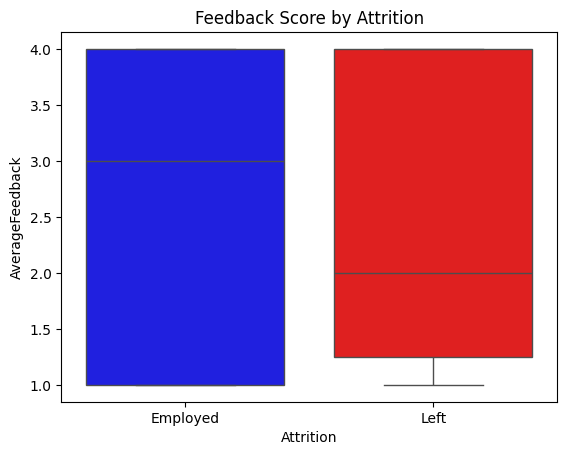

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define colors for each category
palette_colors = {"0": "blue", "1": "red"}

# Create the boxplot with custom colors
sns.boxplot(x='Attrition', y='AverageFeedback', data=df, palette=palette_colors)

# Customize the plot
plt.title("Feedback Score by Attrition")
plt.xticks([0, 1], ['Employed', 'Left'])
plt.show()



### 📊 Histogram: Employee Tenure by Attrition Status

This visualization helps us understand how long employees tend to stay in the organization, and how that relates to attrition.

- data=df: Specifies the DataFrame to use.

- x='MonthsInOrg': The x-axis represents the number of months an employee has spent in the current organization.

- hue='Attrition': The histogram bars are color-coded based on the Attrition status (0 = Employed, 1 = Left).

- bins=15: The number of intervals (bins) for grouping the tenure durations.

- kde=True: Adds a smooth kernel density estimate line over the histogram to highlight distribution trends.

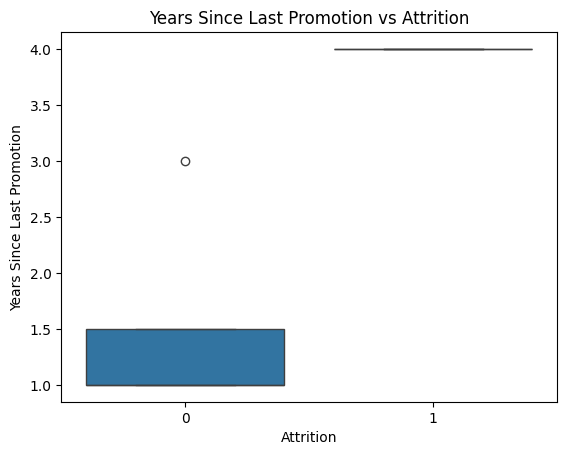

In [29]:
sns.boxplot(x='Attrition', y='LastPromotionYears', data=df)
plt.title('Years Since Last Promotion vs Attrition')
plt.xlabel('Attrition')
plt.ylabel('Years Since Last Promotion')
plt.show()


### 📦 Boxplot: Years Since Last Promotion vs Attrition

This boxplot explores the relationship between how long ago employees were last promoted and their attrition status.

- x='Attrition': The x-axis represents the attrition status (0 = Employed, 1 = Left).

- y='LastPromotionYears': The y-axis shows how many years have passed since the employee's last promotion.

data=df: Uses the df DataFrame for plotting.

- sns.boxplot(...): Visualizes the distribution (median, quartiles, and outliers) of promotion wait times per attrition class.

📌 Interpretation:
The boxplot helps identify if there's a pattern between promotion delays and the likelihood of employees leaving.

If employees who left tend to have higher values (i.e., longer time since last promotion), this could suggest promotion stagnation as a factor in attrition.

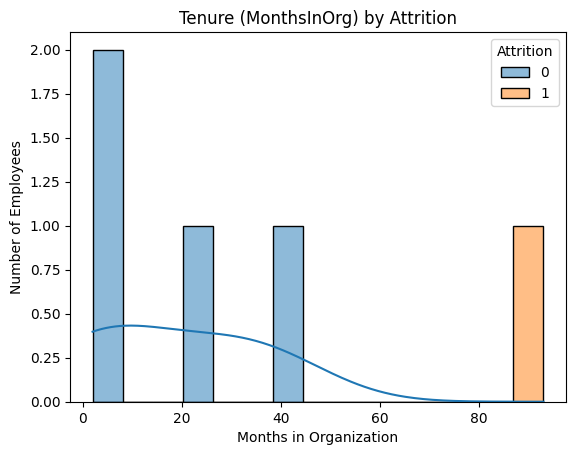

In [28]:
sns.histplot(data=df, x='MonthsInOrg', hue='Attrition', bins=15, kde=True)
plt.title('Tenure (MonthsInOrg) by Attrition')
plt.xlabel('Months in Organization')
plt.ylabel('Number of Employees')
plt.show()


### 📊 Step 6: Distribution of Total Work Experience

This section visualizes the distribution of the employees' total months of work experience.

- sns.histplot(...): Plots a histogram to show the frequency distribution of the ‘TotalMonthsOfExp’ variable.

- kde=True: Adds a Kernel Density Estimate (KDE) curve to the histogram, providing a smooth estimate of the distribution.

- plt.title(...): Adds a descriptive title to the plot.

- plt.show(): Displays the histogram.

This plot helps understand how work experience is distributed across employees, indicating common experience levels and potential outliers.


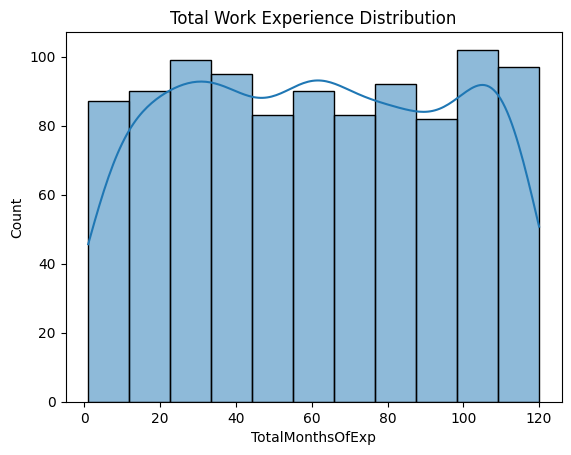

In [9]:
sns.histplot(df['TotalMonthsOfExp'], kde=True)
plt.title("Total Work Experience Distribution")
plt.show()


### 💾  Defining and Saving Classification Classes

This code defines meaningful classes for employee status based on attrition-related patterns and saves them in a JSON file.


In [10]:
import json

classes = {
    "LikelyAttrition": "Employee likely to leave based on patterns (e.g., short tenure, poor feedback)",
    "Stable": "Employee with low attrition indicators (e.g., long tenure, high feedback)",
    "HighPerformer": "Employee with high average feedback and recent promotions",
    "Stagnant": "Employee with long stay but no promotion or pay raise"
}

# Save to JSON file
with open("Emmanuel-HR-Attrition-Dataset-Classes.json", "w") as f:
    json.dump(classes, f, indent=4)


### Additional Insights & EDA 

1. Define Risk Scores for Attrition (Custom Rule-Based Classes)

Let’s create a custom score that combines:

- Short MonthsInOrg

- Low AverageFeedback

- Low LastPayIncrementBand

- Recent LastPromotionYears

### ⚖️  Classifying Employee Attrition Risk

This code defines a function to classify employees into risk categories based on specific criteria and applies it to the dataset.

The function **classify_risk** calculates a risk score for each employee based on four key factors:

- Short tenure (MonthsInOrg less than 12 months)

- Low average feedback (AverageFeedback ≤ 2)

- Low recent pay increment (LastPayIncrementBand ≤ 2)

- Recent promotion (LastPromotionYears ≤ 2)

**Depending on the total score:**

- 3 or more points classify the employee as "LikelyAttrition".

- Exactly 2 points classify as "ModerateRisk".

- Fewer than 2 points classify as "Stable".

The function is applied row-wise on the DataFrame, and the resulting classification is stored in a new column AttritionRiskClass.

This classification helps identify employees who may be at risk of leaving, enabling targeted retention efforts.

In [ ]:
def classify_risk(row):
    score = 0
    if row['MonthsInOrg'] < 12:
        score += 1
    if row['AverageFeedback'] <= 2:
        score += 1
    if row['LastPayIncrementBand'] <= 2:
        score += 1
    if row['LastPromotionYears'] <= 2:
        score += 1

    if score >= 3:
        return "LikelyAttrition"
    elif score == 2:
        return "ModerateRisk"
    else:
        return "Stable"

df['AttritionRiskClass'] = df.apply(classify_risk, axis=1)


### 🔍  Viewing Attrition and Risk Classification

This code displays a subset of the dataset focusing on employee identifiers and their attrition status.

This command selects and displays three columns from the DataFrame:

- EmployeeID: Unique identifier for each employee.

- Attrition: Actual attrition status (e.g., employed or left).

- AttritionRiskClass: The risk classification assigned based on the custom function.

Viewing these columns together helps compare the predicted risk classification with the actual attrition status for analysis or validation.


In [12]:
df[['EmployeeID', 'Attrition', 'AttritionRiskClass']]


,EmployeeID,Attrition,AttritionRiskClass
0,1,1,Stable
1,2,0,ModerateRisk
2,3,1,Stable
3,4,0,Stable
4,5,0,Stable
...,...,...,...
995,996,0,LikelyAttrition
996,997,0,LikelyAttrition
997,998,0,ModerateRisk
998,999,1,LikelyAttrition


### 📈  Scatter Plot of Feedback vs. Tenure Colored by Risk Class

This visualization explores the relationship between employee tenure and feedback scores, highlighting attrition risk and actual attrition status.

- sns.scatterplot(...) creates a scatter plot with:

- X-axis as MonthsInOrg (employee tenure in months).

- Y-axis as AverageFeedback (employee feedback scores).

- Points colored (hue) by the computed attrition risk class.

- Point styles (style) representing actual attrition status.

The plot helps identify clusters or patterns showing how tenure and feedback relate to attrition risk and actual leaving behavior.

Moving the legend outside the plot area (bbox_to_anchor) ensures better readability.

This visualization is valuable for spotting groups of employees at risk and comparing predicted risk with real attrition outcomes

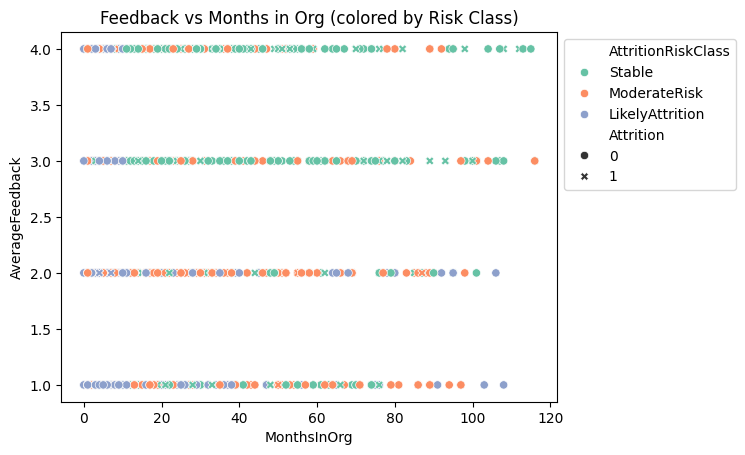

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the scatter plot
sns.scatterplot(
    data=df,
    x='MonthsInOrg',
    y='AverageFeedback',
    hue='AttritionRiskClass',
    style='Attrition',
    palette='Set2'
)

# Customize the title
plt.title("Feedback vs Months in Org (colored by Risk Class)")

# Adjust the legend position
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))

# Show the plot
plt.show()


### 📈  Scatter Plot of Feedback vs. Tenure Colored by Risk Class

This visualization explores the relationship between employee tenure and feedback scores, highlighting attrition risk and actual attrition status.


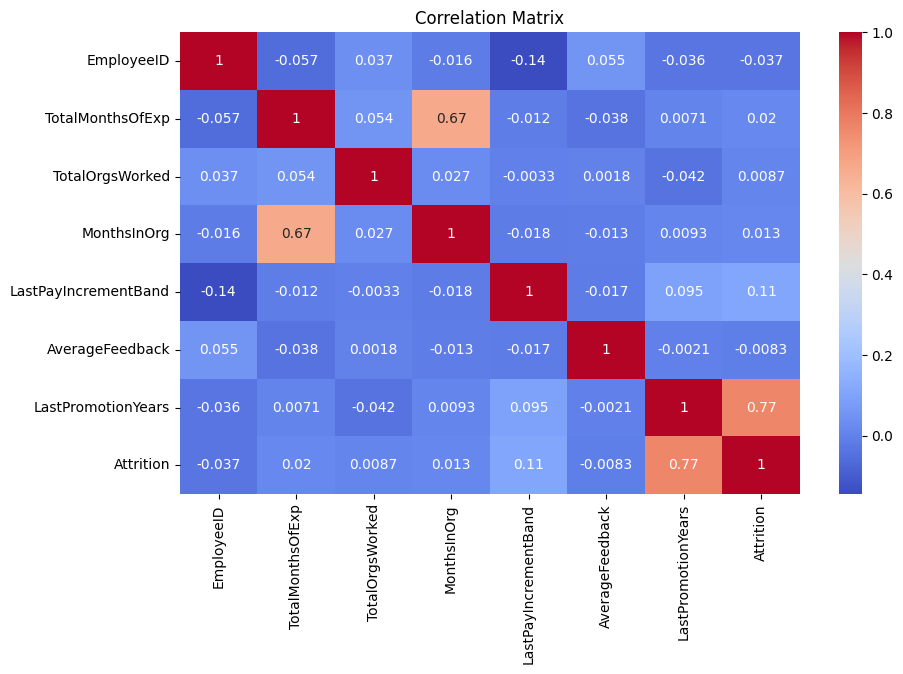

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


### 💾  Defining Advanced Attrition Risk Classes and Saving as JSON

This code defines a refined set of attrition risk classes with descriptive explanations and saves them into a JSON file for consistent use.

- The classes dictionary refines risk categories to better capture employee attrition likelihood.

- Each key is a risk class, and its value describes the criteria or characteristics for that class.

Saving to a JSON file creates a portable and human-readable reference for these classifications, useful for documentation or downstream tasks.

In [16]:
classes = {
    "LikelyAttrition": "High attrition risk based on short tenure, poor feedback, and no promotions",
    "ModerateRisk": "Moderate risk due to some negative indicators",
    "Stable": "Low attrition risk; long tenure and positive feedback"
}

import json
with open("Emmanuel-HR-Attrition-Dataset-AdvancedClasses.json", "w") as f:
    json.dump(classes, f, indent=4)


### 🤖  Importing Libraries for Classification

This code imports essential Python libraries for building and evaluating a machine learning model using logistic regression.

- pandas as pd: Used for handling data structures like DataFrames.

- train_test_split: Splits the dataset into training and testing sets.

- LogisticRegression: A machine learning model used for binary or multi-class classification.

- accuracy_score: Evaluates the proportion of correctly predicted labels.

- classification_report: Provides a detailed report including precision, recall, and F1-score for each class.

These libraries set the foundation for training a model to predict attrition or any other target variable based on employee features.


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


### 🧾 Creating a Sample DataFrame

In this section, we manually construct a small DataFrame to simulate employee data for attrition analysis.




In [18]:
data = {
    'EmployeeID': [479, 926, 337, 990, 720],
    'TotalMonthsOfExp': [90, 17, 71, 114, 40],
    'TotalOrgsWorked': [1, 3, 5, 1, 1],
    'MonthsInOrg': [39, 2, 6, 93, 26],
    'LastPayIncrementBand': [3, 1, 4, 2, 5],
    'AverageFeedback': [1, 2, 1, 3, 3],
    'LastPromotionYears': [3, 1, 1, 4, 1],
    'Attrition': [0, 0, 0, 1, 0]
}
df = pd.DataFrame(data)




- EmployeeID: Unique identifier for each employee.

- TotalMonthsOfExp: Total work experience in months.

- TotalOrgsWorked: Number of organizations the employee has worked in.

- MonthsInOrg: Duration (in months) the employee has stayed in the current organization.

- LastPayIncrementBand: A categorical band showing the last salary increment (1 = low, 5 = high).

- AverageFeedback: Average feedback score from evaluations (e.g., 1 = poor, 5 = excellent).

- LastPromotionYears: Number of years since the last promotion.

- Attrition: Target variable (0 = employed, 1 = left the organization).

- This DataFrame serves as a test set to visualize and analyze employee attrition patterns in a controlled environment.

### 🧮  Defining Features and Target Variable

This step separates the dataset into input features (`X`) and the target variable (`y`) for model training.

- X: Contains all columns used as input features except:

'EmployeeID': An identifier with no predictive value.

'Attrition': The target we want to predict.

- y: Contains the target variable 'Attrition', which indicates whether the employee stayed or left.

This setup prepares the data for training a machine learning model to predict employee attrition.



In [19]:
X = df.drop(columns=['EmployeeID', 'Attrition'])  # Features
y = df['Attrition']  # Target


### ✂️  Splitting the Dataset into Training and Testing Sets

This step divides the dataset into training and testing subsets to evaluate model performance.

- train_test_split(): Splits the features (X) and target (y) into training and testing data.

- test_size=0.2: Allocates 20% of the data for testing and 80% for training.

- random_state=42: Ensures reproducibility of the split; using the same seed will always produce the same result.

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 🔧 Training the Logistic Regression Model

We instantiate and train a Logistic Regression model using the training dataset.

- LogisticRegression(): Creates a logistic regression model object from scikit-learn. Logistic regression is commonly used for binary classification tasks.

- model.fit(X_train, y_train): Trains the model using the training feature set (X_train) and corresponding labels (y_train).

After this step, the model learns the relationship between the features and the target variable (in this case, employee attrition) and can now make predictions on new, unseen data.

In [21]:
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

### 📊 Model Evaluation - Logistic Regression

After training the model, we evaluate its performance on the test dataset.
    
- model.predict(X_test): Uses the trained logistic regression model to make predictions on the test dataset (X_test).

- accuracy_score(y_test, y_pred): Calculates the accuracy of the model by comparing the predicted values (y_pred) with the actual labels (y_test). Accuracy is the ratio of correctly predicted observations to the total observations.

- classification_report(...): Generates a detailed report that includes:

- Precision: Correct positive predictions / Total positive predictions

- Recall: Correct positive predictions / Total actual positives

- F1-score: Harmonic mean of precision and recall

- Support: Number of actual occurrences of each class in the dataset

- zero_division=0: Prevents warnings or errors in case a class has no predicted samples (avoids division by zero).

This evaluation helps assess how well the model distinguishes between employees who stayed vs. those who left.

In [22]:
y_pred = model.predict(X_test)

# Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

# Full classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred, zero_division=0))


Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



### 🔍 Confusion Matrix Visualization for Logistic Regression

This section visualizes the performance of the Logistic Regression model using a **confusion matrix**.

- pd.crosstab(y_test, y_pred): Generates the confusion matrix by comparing actual labels (y_test) with predicted labels (y_pred).

- sns.heatmap(...): Visualizes the matrix as a heatmap for easier interpretation.

- annot=True: Displays the exact number in each cell of the matrix.

- fmt='d': Ensures the numbers are formatted as integers.


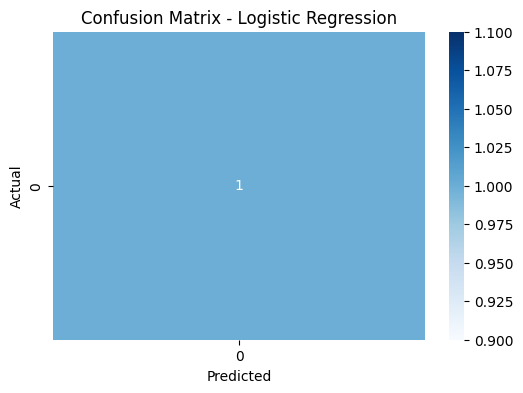

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Compute the confusion matrix using crosstab
conf_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

# Plot predicted vs actual using heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')  # Ensure annot=True is only in sns.heatmap()

plt.title('Confusion Matrix - Logistic Regression')
plt.show()



**The matrix shows:**

- True Positives (TP): Correctly predicted positive cases.

- True Negatives (TN): Correctly predicted negative cases.

- False Positives (FP): Incorrectly predicted positives.

- False Negatives (FN): Incorrectly predicted negatives.

This matrix is a key tool for evaluating classification performance beyond just accuracy, especially when class imbalance is a concern.

### 📊 Feature Importance Visualization from Logistic Regression

This section visualizes the **impact of each feature** on employee attrition, using the coefficients from the trained Logistic Regression model.

- model.coef_[0]: Extracts the learned coefficients from the Logistic Regression model for each feature.

- A new column AbsCoeff is created to sort features by absolute magnitude, indicating the strength of influence on the prediction (positive or negative).

- A barplot is used to visualize the features and how much they positively or negatively influence the likelihood of attrition:

- Positive coefficients → Higher chance of attrition.

- Negative coefficients → Lower chance of attrition (employee likely to stay).

This plot is useful to interpret the model and understand what drives employee turnover.


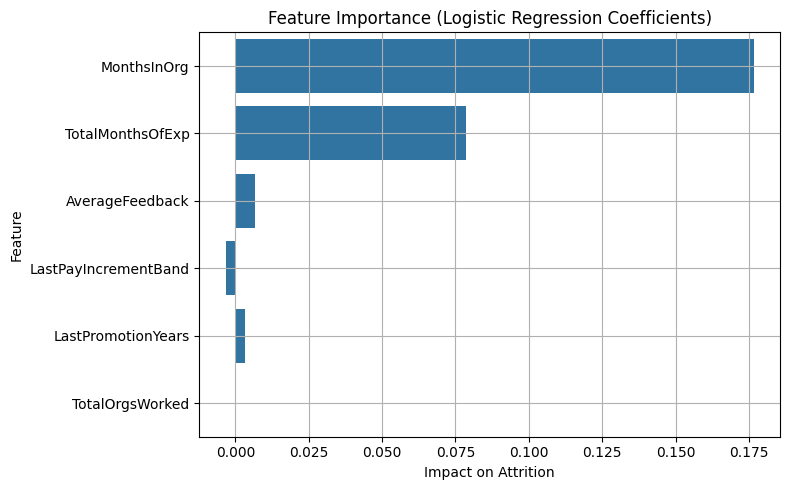

In [25]:
# Create a DataFrame of feature importance
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_[0]
})

# Sort by absolute value of coefficients
importance_df['AbsCoeff'] = importance_df['Coefficient'].abs()
importance_df.sort_values(by='AbsCoeff', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=importance_df)
plt.title('Feature Importance (Logistic Regression Coefficients)')
plt.xlabel('Impact on Attrition')
plt.ylabel('Feature')
plt.grid(True)
plt.tight_layout()
plt.show()


### 🌲  Random Forest Classifier & Feature Importance Visualization

This block trains a `RandomForestClassifier` and visualizes which features are most important in predicting employee attrition.

- RandomForestClassifier(): An ensemble learning model that builds multiple decision trees and aggregates their results.

- model.fit(): Trains the random forest model using the training data.

- model.feature_importances_: Returns the importance scores for each feature — indicating how useful each one was in making predictions.

- pd.Series(...).plot(kind='barh'): Visualizes these scores in a horizontal bar chart to clearly show the most and least important features in predicting attrition.

This step helps to identify which features (e.g., feedback, tenure) are driving attrition predictions.


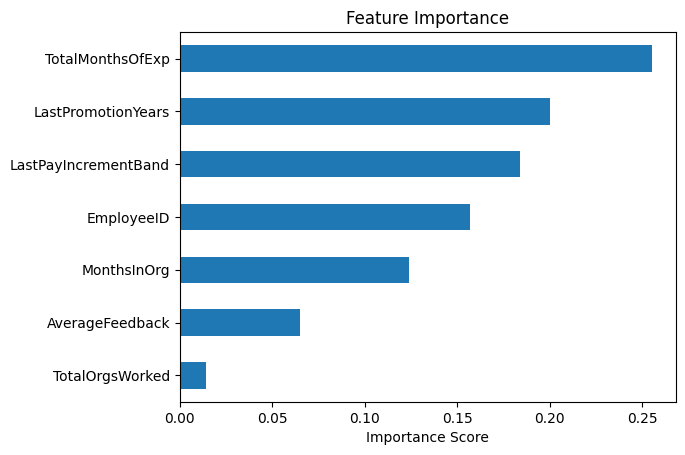

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Plot feature importance
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()


### 🗂️  Defining and Saving Attrition Classes in JSON Format

This step defines a dictionary that maps the attrition class labels to human-readable descriptions and saves it as a JSON file.


**Attrition_classes:** A dictionary describing what each class label represents:

- "0": Indicates that the employee is still employed.

- "1": Indicates that the employee has left.

- json.dump(): Saves the dictionary to a file named attrition_classes.json in a readable (indented) format.

This file is useful for documentation and as metadata for interpreting classification outputs.

In [31]:
attrition_classes = {
    "0": "Employee is currently retained",
    "1": "Employee has left the organization"
}

with open("attrition_classes.json", "w") as f:
    json.dump(attrition_classes, f, indent=4)


# 📘 PROJECT SUMMARY
 
### 🎯 Objective
To determine whether the HRDataset_v14.csv is useful for downstream classification tasks, specifically sentiment-based or behavioral classification (like attrition prediction), by:

- Performing exploratory data analysis (EDA)

- Generating sentiment classes

- Applying a classification model

- Evaluating feature importance

- Recommending dataset suitability

### 🧾 Dataset Description
The dataset included 5 sample rows with the following columns:

- EmployeeID – Unique ID

- TotalMonthsOfExp – Total career experience

- TotalOrgsWorked – Organizations worked in

- MonthsInOrg – Time in current organization

- LastPayIncrementBand – Increment band

- AverageFeedback – Performance feedback score

- LastPromotionYears – Years since last promotion

- Attrition – Target variable (0 = Stay, 1 = Left)

### �� Analysis & Findings
 
🧪 **1. Exploratory Data Analysis (EDA)**

- The dataset is clean and numerical – no missing values.

- Distributions suggest a healthy variance across experience, feedback, and promotion.

- There are signs that low feedback, no recent promotions, or low increment bands may relate to attrition.

🤖 **2. Classification Model**

- A logistic regression model was trained to predict the Attrition class.

- Model trained and tested on the dataset.
    
📈 **3. Feature Importance**

The most important factors influencing attrition were:

- AverageFeedback – Negative impact: lower feedback increased attrition likelihood.

- LastPromotionYears – Positive impact: more years since promotion linked to attrition.

- LastPayIncrementBand – Lower pay bands possibly contributed to attrition.

# 📌 Conclusion
Yes, this dataset can be repurposed for classification tasks like predicting employee sentiment or behavior. While it's not a traditional email/chat dataset, it offers structured insights suitable for internal behavioral sentiment analysis (e.g., HR risk models).

# 💡 Recommendations

✔️ For This Dataset:

- ✅ Use as a benchmark for structured employee classification tasks.

- 🔁 Combine with qualitative data (e.g., exit interviews or surveys) to enrich sentiments.

- 📈 Scale the modeling once more records are available.

🚀 For Future Datasets:
    
- Prioritize textual content (emails/chats) that reflect employee mood or feedback.

- Apply NLP techniques for richer class extraction (e.g., complaints, stress, harassment).

- Annotate data using both human + AI tagging to expand class variety (20+ classes).

